In [37]:
import torch

In [38]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

### Drawing the data points

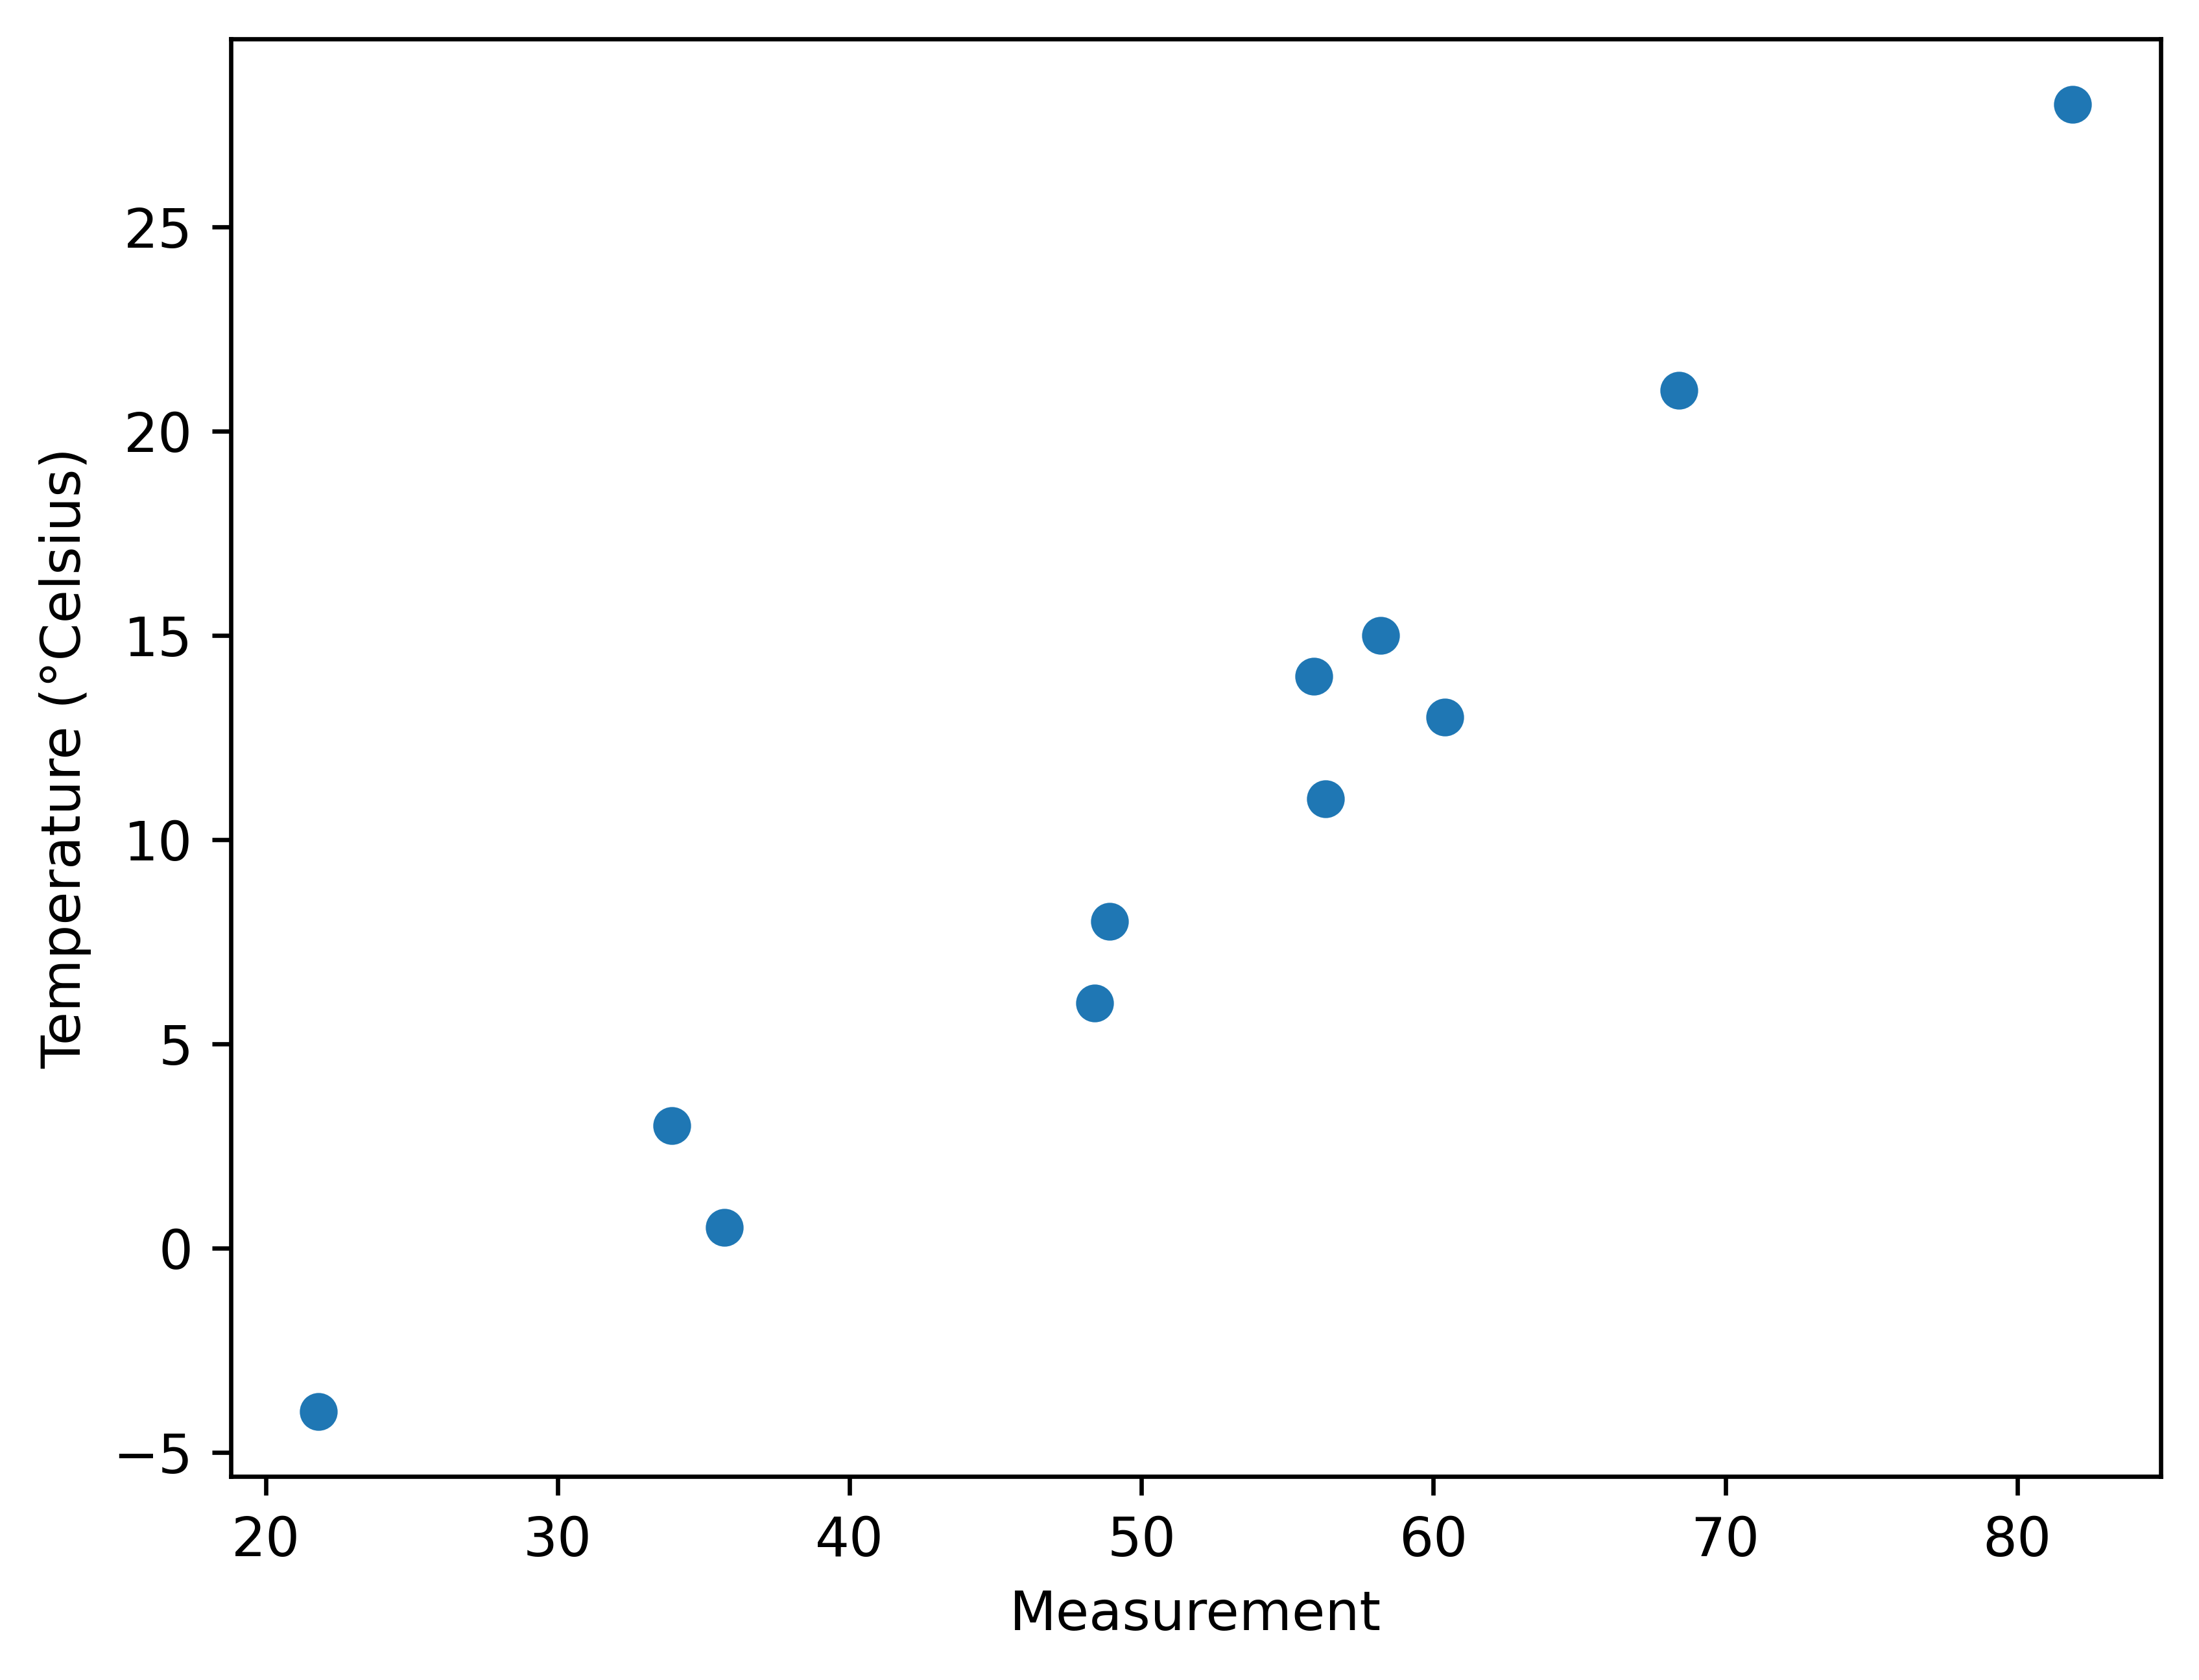

In [39]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

fig = plt.figure(dpi=600)
plt.xlabel("Measurement")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

plt.savefig("temp_data_plot.png", format="png")

The linear model y = w * x + b

In [40]:
def model(t_u, w, b):
    return w * t_u + b

The loss function

In [41]:
def loss_fn(t_p, t_c):
    squared_diff = (t_p - t_c) ** 2
    return squared_diff.mean()

In [42]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [43]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8846)

In [44]:
delta = 0.1

loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) - 
     loss_fn(model(t_u, w - delta, b), t_c)) / (2 * delta)

loss_rate_of_change_w

tensor(4517.2979)

In [45]:
learning_rate = 0.01

w = w - learning_rate * loss_rate_of_change_w

In [46]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) - 
     loss_fn(model(t_u, w, b - delta), t_c)) / (2 * delta)

loss_rate_of_change_b

tensor(-4602.5000)

In [47]:
b = b - learning_rate * loss_rate_of_change_b

Derivative of the loss compared to its input (tp)

In [48]:
def dloss_fn(tp, tc):
    dsq_diffs = 2 * (tp - tc) / tp.size(0)
    return dsq_diffs

Derivative of the model compared to its inputs

In [49]:
def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

In [50]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [56]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)

        params = params - learning_rate * grad
        
        print(f'Epoch {epoch}, Loss {float(loss):.6f}')
        print(f'Params: {params}')
        print(f'Gradient: {grad}')
    return params

In [69]:
t_un = 0.1 * t_u

params = training_loop(n_epochs=5000, learning_rate=1e-2, params=torch.tensor([1.0, 0.0]), t_u = t_un, t_c=t_c)

params

Epoch 1, Loss 80.364342
Params: tensor([1.7761, 0.1064])
Gradient: tensor([-77.6140, -10.6400])
Epoch 2, Loss 37.574917
Params: tensor([2.0848, 0.1303])
Gradient: tensor([-30.8623,  -2.3864])
Epoch 3, Loss 30.871077
Params: tensor([2.2094, 0.1217])
Gradient: tensor([-12.4631,   0.8587])
Epoch 4, Loss 29.756193
Params: tensor([2.2616, 0.1004])
Gradient: tensor([-5.2218,  2.1327])
Epoch 5, Loss 29.507149
Params: tensor([2.2853, 0.0740])
Gradient: tensor([-2.3715,  2.6310])
Epoch 6, Loss 29.392456
Params: tensor([2.2978, 0.0458])
Gradient: tensor([-1.2492,  2.8241])
Epoch 7, Loss 29.298828
Params: tensor([2.3059, 0.0168])
Gradient: tensor([-0.8071,  2.8970])
Epoch 8, Loss 29.208717
Params: tensor([ 2.3122, -0.0124])
Gradient: tensor([-0.6325,  2.9227])
Epoch 9, Loss 29.119413
Params: tensor([ 2.3178, -0.0417])
Gradient: tensor([-0.5633,  2.9298])
Epoch 10, Loss 29.030489
Params: tensor([ 2.3232, -0.0710])
Gradient: tensor([-0.5355,  2.9295])
Epoch 11, Loss 28.941875
Params: tensor([ 2.328

tensor([  5.3671, -17.3012])

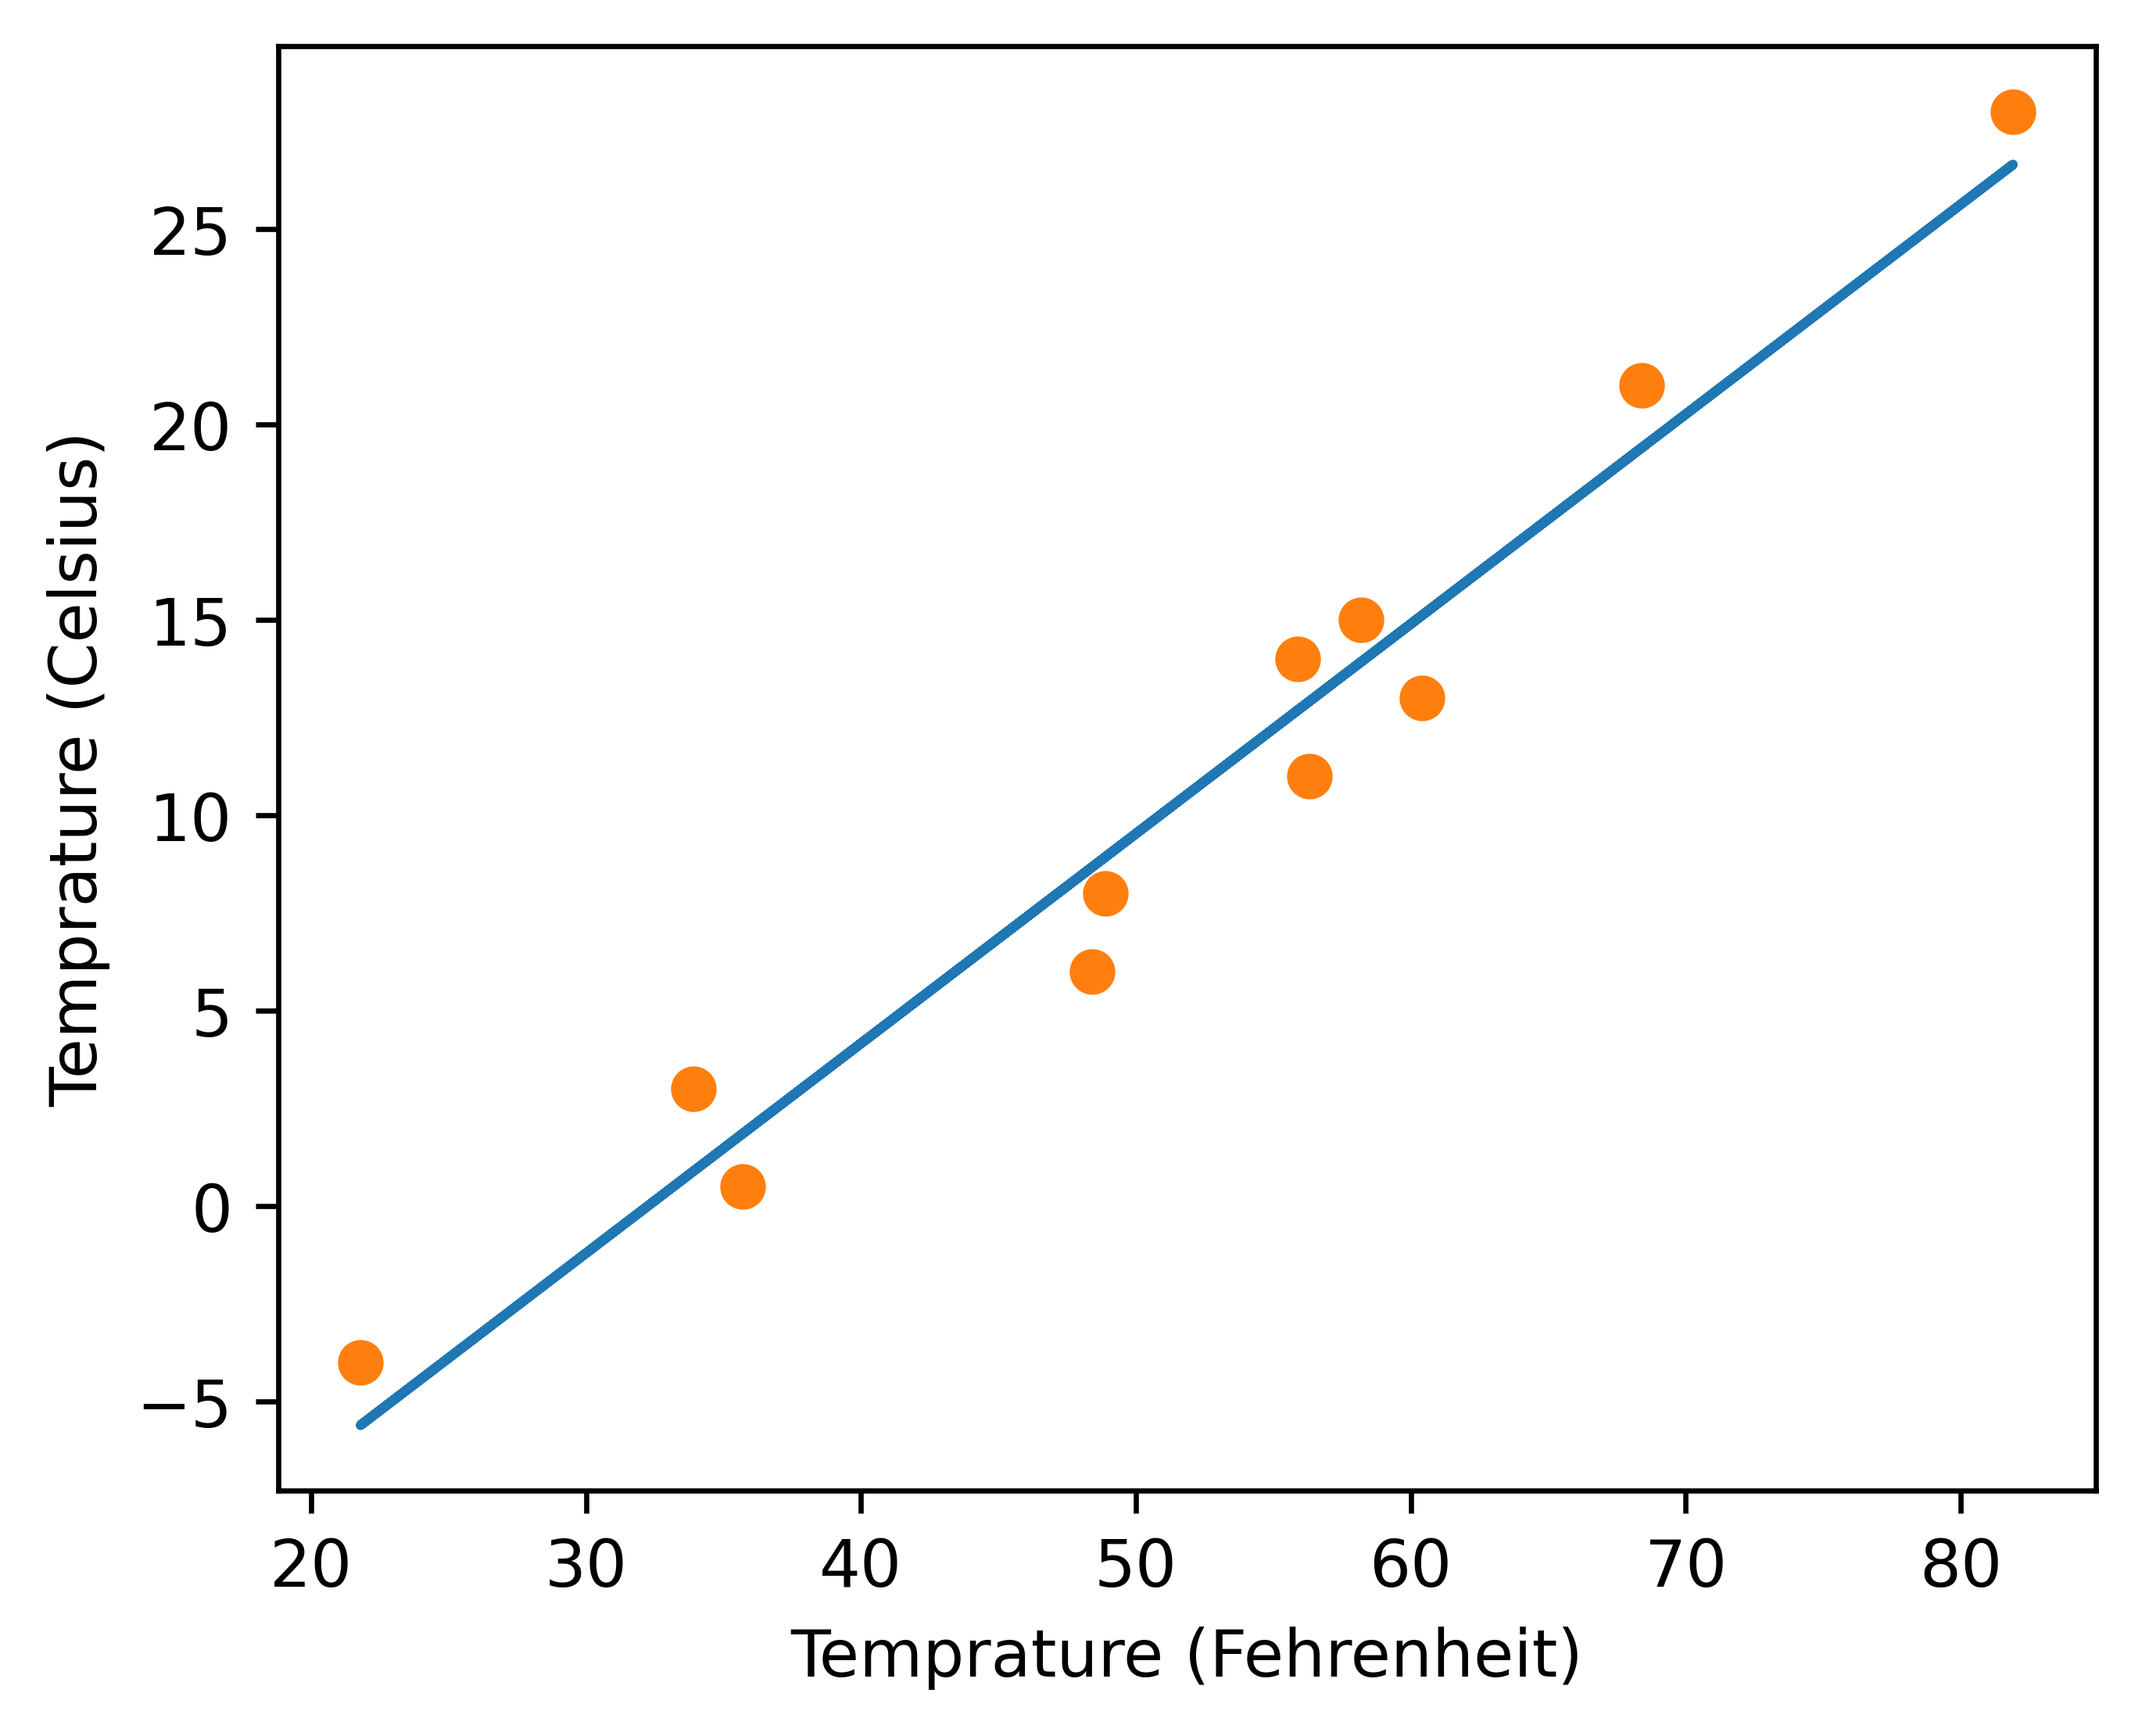

In [76]:
%matplotlib inline
from matplotlib import pyplot as pyplot

t_p = model(t_un, *params)

fig = plt.figure(figsize=(5,4), dpi=600)
plt.xlabel("Temprature (Fehrenheit)")
plt.ylabel("Temprature (Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

